Research:
https://medium.com/analytics-vidhya/using-machine-learning-to-predict-flight-delays-e8a50b0bb64c

Another possible data set to use instead
https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018


### Will the flight be delayed at the destination?

In [45]:
import pandas as pd

df = pd.read_csv('nyc-flights.csv',
                 parse_dates= {"date" : ["year","month","day"]},
                keep_date_col=False)

In [46]:
df.sort_values(by='date', inplace=True)

### Modify and add new categorical variables

In [47]:
#https://stackoverflow.com/questions/32278728/convert-dataframe-date-row-to-a-weekend-not-weekend-value/32280195
# Adding a new weekday variable - 1 means weekday, 2 means weekend
df['weekday'] = (df['date'].dt.dayofweek < 5).astype(float)
df[['weekday']].value_counts()

weekday
1.0        24384
0.0         8351
dtype: int64

In [48]:
df.head()

,date,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,weekday
23577,2013-01-01,855,-4,1143,-2,DL,N646DL,1747,LGA,ATL,129,762,8,55,1.0
2903,2013-01-01,1529,-1,1733,-4,US,N738US,1665,LGA,CLT,103,544,15,29,1.0
702,2013-01-01,753,-2,1056,-14,AA,N3HMAA,2267,LGA,MIA,157,1096,7,53,1.0
2951,2013-01-01,1701,-9,2026,11,AA,N3FUAA,695,JFK,AUS,247,1521,17,1,1.0
14643,2013-01-01,1603,-2,1818,28,MQ,N730MQ,4415,LGA,RDU,79,431,16,3,1.0


In [49]:
df.dtypes

date         datetime64[ns]
dep_time              int64
dep_delay             int64
arr_time              int64
arr_delay             int64
carrier              object
tailnum              object
flight                int64
origin               object
dest                 object
air_time              int64
distance              int64
hour                  int64
minute                int64
weekday             float64
dtype: object

In [50]:
# hour 5 am-12 pm morning [5-12]
# 12-17 afternoon [12-5]
# 17 - 23 pm evening [5-11]
# 23 - 5 am redeye [11-5]
import math
import numpy as np
#https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
    
df['dep_time_hour'] = ((df['dep_time']/100).astype('int'))

conditions = [
    (df['dep_time_hour'] >= 5) & (df['dep_time_hour'] < 12),
    (df['dep_time_hour'] >= 12) & (df['dep_time_hour'] < 17),
    (df['dep_time_hour'] >= 17) & (df['dep_time_hour'] < 23),
    (df['dep_time_hour'] >= 23) & (df['dep_time_hour'] < 5)
    ]

# create a list of the values we want to assign for each condition
values = [0,1,2,3]
#values = ['morning', 'afternoon', 'evening', 'red-eye']

# create a new column and use np.select to assign values to it using our lists as arguments
df['dep_time_category'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,date,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,weekday,dep_time_hour,dep_time_category
23577,2013-01-01,855,-4,1143,-2,DL,N646DL,1747,LGA,ATL,129,762,8,55,1.0,8,0
2903,2013-01-01,1529,-1,1733,-4,US,N738US,1665,LGA,CLT,103,544,15,29,1.0,15,1
702,2013-01-01,753,-2,1056,-14,AA,N3HMAA,2267,LGA,MIA,157,1096,7,53,1.0,7,0
2951,2013-01-01,1701,-9,2026,11,AA,N3FUAA,695,JFK,AUS,247,1521,17,1,1.0,17,2
14643,2013-01-01,1603,-2,1818,28,MQ,N730MQ,4415,LGA,RDU,79,431,16,3,1.0,16,1


In [51]:
# arrival time
import math
import numpy as np
#https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
    
df['arr_time_hour'] = ((df['arr_time']/100).astype('int'))

conditions = [
    (df['arr_time_hour'] >= 5) & (df['arr_time_hour'] < 12),
    (df['arr_time_hour'] >= 12) & (df['arr_time_hour'] < 17),
    (df['arr_time_hour'] >= 17) & (df['arr_time_hour'] < 23),
    (df['arr_time_hour'] >= 23) & (df['arr_time_hour'] < 5)
    ]

# create a list of the values we want to assign for each condition
values = [0,1,2,3]
#values = ['morning', 'afternoon', 'evening', 'red-eye']

# create a new column and use np.select to assign values to it using our lists as arguments
df['arr_time_category'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,date,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,weekday,dep_time_hour,dep_time_category,arr_time_hour,arr_time_category
23577,2013-01-01,855,-4,1143,-2,DL,N646DL,1747,LGA,ATL,129,762,8,55,1.0,8,0,11,0
2903,2013-01-01,1529,-1,1733,-4,US,N738US,1665,LGA,CLT,103,544,15,29,1.0,15,1,17,2
702,2013-01-01,753,-2,1056,-14,AA,N3HMAA,2267,LGA,MIA,157,1096,7,53,1.0,7,0,10,0
2951,2013-01-01,1701,-9,2026,11,AA,N3FUAA,695,JFK,AUS,247,1521,17,1,1.0,17,2,20,2
14643,2013-01-01,1603,-2,1818,28,MQ,N730MQ,4415,LGA,RDU,79,431,16,3,1.0,16,1,18,2


In [52]:
new_df = df.drop(columns=['tailnum', 'flight','hour','minute','dep_time_hour','arr_time_hour','dep_time','arr_time'])


In [53]:
new_df.head()

,date,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,weekday,dep_time_category,arr_time_category
23577,2013-01-01,-4,-2,DL,LGA,ATL,129,762,1.0,0,0
2903,2013-01-01,-1,-4,US,LGA,CLT,103,544,1.0,1,2
702,2013-01-01,-2,-14,AA,LGA,MIA,157,1096,1.0,0,0
2951,2013-01-01,-9,11,AA,JFK,AUS,247,1521,1.0,2,2
14643,2013-01-01,-2,28,MQ,LGA,RDU,79,431,1.0,1,2


In [54]:
# chart ideas
# count delays for each diff time category bar chart
# count delays for weekends vs weekdays bar chart

In [55]:
new_df['dep_delay'] = (new_df['dep_delay'] > 0).astype(int)

In [56]:
new_df.tail()

,date,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,weekday,dep_time_category,arr_time_category
19776,2013-12-31,1,6,9E,JFK,DCA,54,213,1.0,2,2
3849,2013-12-31,0,-35,EV,LGA,ORF,51,296,1.0,1,2
5562,2013-12-31,1,45,B6,JFK,FLL,180,1069,1.0,0,1
2742,2013-12-31,0,-12,DL,LGA,ATL,129,762,1.0,0,0
26857,2013-12-31,0,24,B6,JFK,FLL,181,1069,1.0,0,1


<AxesSubplot:>

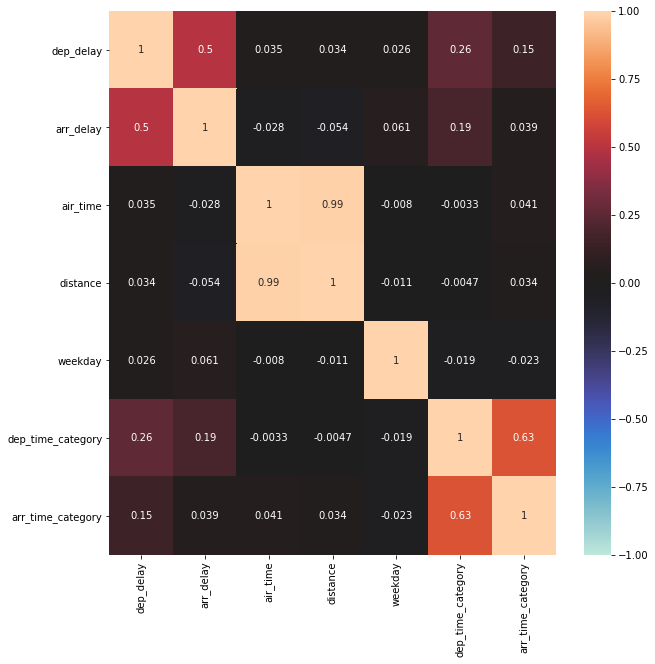

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(new_df.corr(), annot=True, vmin=-1, vmax=1, center= 0, ax=ax)

/Users/shivaniparekh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shivaniparekh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shivaniparekh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shivaniparekh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/shivaniparekh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


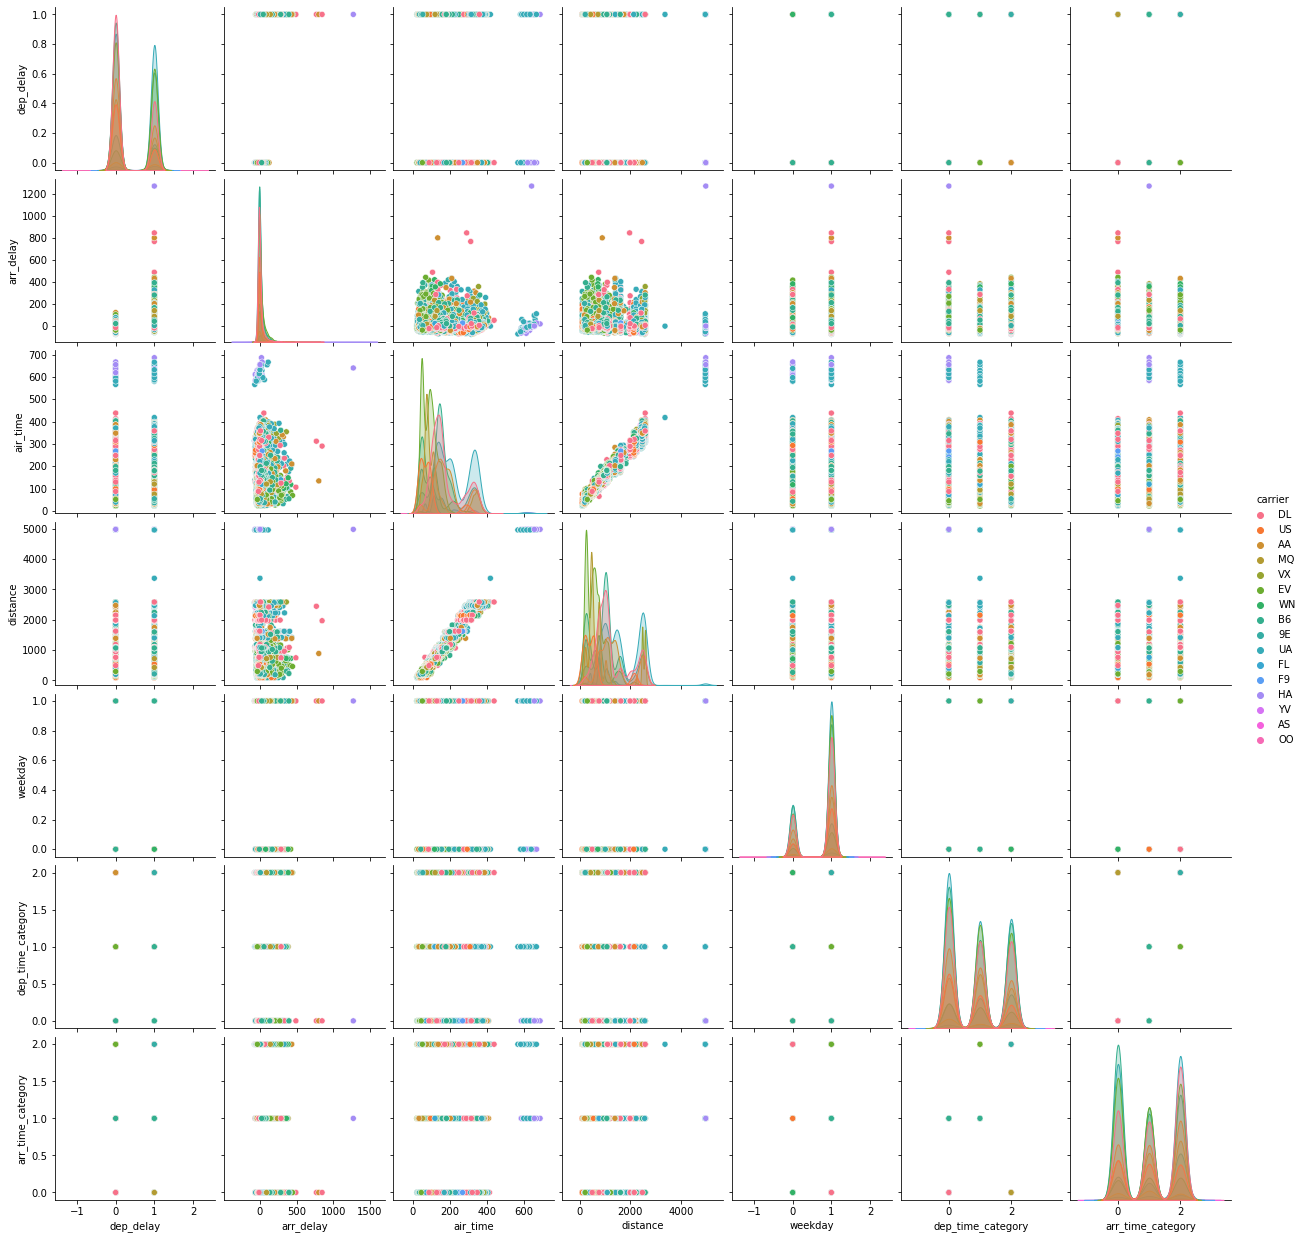

In [58]:
sns.pairplot(new_df, hue='carrier')

In [59]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

principal component analysis
subtract arrival time from departure time

In [60]:
X = new_df[['air_time','weekday','dep_time_category']]
y = new_df[['dep_delay']]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [67]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6443335709194583


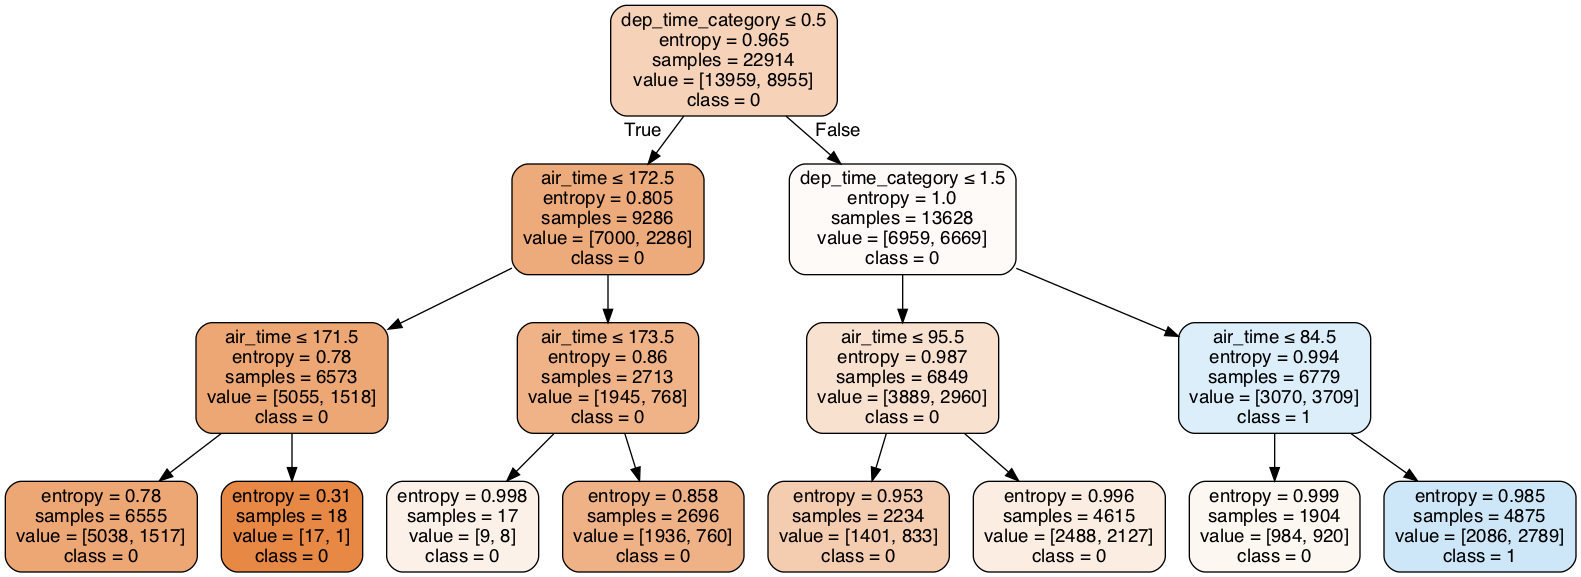

In [68]:
from sklearn.tree import export_graphviz
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
